In [126]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification,make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,r2_score

# RandomForestClassifier

In [19]:
x,y = make_classification(n_samples=501,n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [20]:
data = pd.DataFrame(x,columns=['col1','col2','col3','col4','col4'])
data['target'] = y
data

,col1,col2,col3,col4,col4,target
0,2.002240,4.346202,0.892393,-1.980554,4.269988,0
1,-1.709576,-0.669287,0.989569,0.485585,-0.331543,1
2,-0.919741,-0.945548,-0.393944,1.334403,-0.167690,1
3,1.994287,-0.779448,0.853644,-1.553793,-0.670700,0
4,0.463389,-1.040365,1.553587,0.732004,0.689406,1
...,...,...,...,...,...,...
496,3.865098,-1.115465,2.493800,-0.175587,2.596615,1
497,1.894566,-4.471638,-1.522728,0.780613,-0.649073,0
498,1.454539,-0.681250,-1.838469,-2.857379,0.503409,0
499,1.924203,-0.758361,0.597205,0.994758,1.634326,1


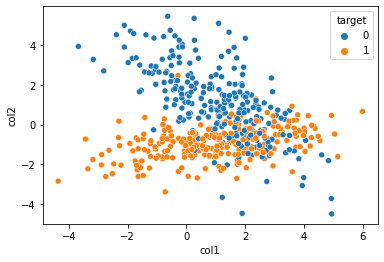

In [22]:
sns.scatterplot(x = 'col1',y = 'col2',hue='target',data = data)
plt.show()

In [23]:
rfc = RandomForestClassifier()

In [28]:
x = data.iloc[:,0:4]
y = data.iloc[:,-1:]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(400, 4)
(101, 4)
(400, 1)
(101, 1)


In [29]:
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
ypred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [40]:
ypred = ypred.flatten()
ypred
print("Accuracy = ",accuracy_score(ypred,ytest))

Accuracy =  0.9801980198019802


# RandomForestRegressor

In [92]:
x,y=make_regression(n_samples=501,n_features=5,random_state=42,n_targets=1)
data1 = pd.DataFrame(x,y,columns=['col1','col2','col3','col4','col5'])
data1['taret'] = y
data1.reset_index(drop=True, inplace=True)


In [114]:
data1.sample(5)

,col1,col2,col3,col4,col5,taret
96,-2.591042,0.183360,-0.546244,0.391804,-1.478912,-185.841438
419,1.804348,-0.956436,-0.190904,0.719758,-1.293273,-16.612492
133,-0.605861,-0.549557,1.719378,1.992515,-0.766657,59.332500
288,-1.229550,2.644343,0.496699,-0.465310,-0.105948,162.022349
480,0.721672,-1.222128,-1.129052,-0.524520,0.489375,-125.966214


In [115]:
x = data1.iloc[:,0:5].values
y = data1.iloc[:,-1:].values

In [123]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(400, 1)
(45, 1)
(400, 1)
(45, 1)


In [124]:
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
ypred1 = rfr.predict(xtest)

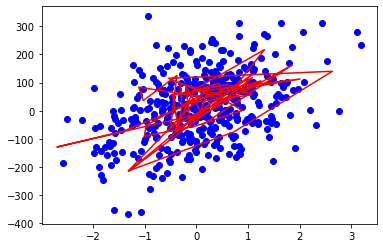

In [125]:
x = xtrain[:,0:1]
y = ytrain
x1 = xtest[:,0:1]
y1 = ypred1
x1 = xtest[:,0:1]
y1 = ypred1
plt.plot(x1,y1,color='r')
plt.scatter(x,y,color='b')
plt.title("")
plt.show()

# Bagging Classifier vs Random forest Classifier

In [127]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

In [133]:
x,y = make_classification(n_features=5,n_redundant=0,n_clusters_per_class=1)
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
df.sample(9)

,col1,col2,col3,col4,col5,target
51,0.435965,2.081757,-0.653472,1.464003,-1.228527,1
7,0.141158,3.082053,-1.874731,2.352388,0.002210,1
62,-0.855820,0.970954,-2.425519,0.992497,1.011007,1
69,0.584176,1.740755,1.015565,1.853539,-0.669892,1
96,-0.630985,0.414818,0.333094,1.149096,0.685843,1
37,-0.803660,-1.107830,0.069799,-1.317415,1.383990,0
54,-0.054049,0.683538,0.681296,1.761912,1.775717,1
82,1.203975,-1.252184,0.776732,-0.112001,1.380553,0
58,0.479622,-1.269383,0.489818,0.212199,-0.673181,0


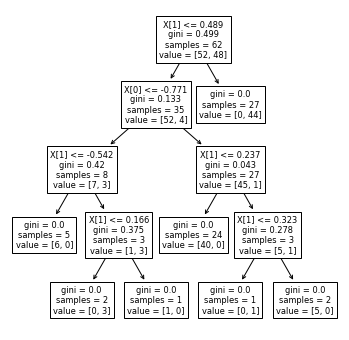

In [138]:
bagc = BaggingClassifier(max_features=2)
bagc.fit(df.iloc[:,:5],df.iloc[:,-1:])
plt.figure(figsize=(6,6))
plot_tree(bagc.estimators_[0])
plt.show()

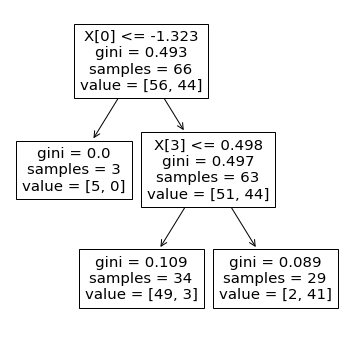

In [137]:
rf = RandomForestClassifier(max_depth=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1:])
plt.figure(figsize=(6,6))
plot_tree(rf.estimators_[4])
plt.show()